+ https://github.com/JuliaAcademy/DataScience/blob/master/04.%20Dimensionality%20Reduction.ipynb

In [90]:
using Pkg
Pkg.activate(".")

 Activating environment at `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\appunti\Project.toml`


In [91]:
# 3 tipi di dim red t-SNE, PCA, umap
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

In [92]:

C = DataFrame(VegaDatasets.dataset("cars"))
@show names(C)
C[1:10,1:9]

names(C) = ["Name", "Miles_per_Gallon", "Cylinders", "Displacement", "Horsepower", "Weight_in_lbs", "Acceleration", "Year", "Origin"]


,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
,String,Float64?,Int64,Float64,Int64?
1,chevrolet chevelle malibu,18.0,8,307.0,130
2,buick skylark 320,15.0,8,350.0,165
3,plymouth satellite,18.0,8,318.0,150
4,amc rebel sst,16.0,8,304.0,150
5,ford torino,17.0,8,302.0,140
6,ford galaxie 500,15.0,8,429.0,198
7,chevrolet impala,14.0,8,454.0,220
8,plymouth fury iii,14.0,8,440.0,215
9,pontiac catalina,14.0,8,455.0,225


In [93]:
dropmissing!(C)#non vogliamo gestire valori missing -> li togliamo
M = Matrix(C[:,2:7]) #funzioni riduzione dimensionalita operano su matrici quindi prendiamoci matrice
# prendiamo solo colonne per valori "Miles_per_Gallon" "Cylinders" "Displacement" "Horsepower" "Weight_in_lbs" "Acceleration"
names(C) # vediamo cosa contiene

9-element Array{String,1}:
 "Name"
 "Miles_per_Gallon"
 "Cylinders"
 "Displacement"
 "Horsepower"
 "Weight_in_lbs"
 "Acceleration"
 "Year"
 "Origin"

In [94]:
car_origin = C[:,:Origin]# prendiamo vettori origini
carmap = labelmap(car_origin) #from MLBase, mappa i valori stringa in numeri unicamente rappresentanti al valore
uniqueids = labelencode(carmap,car_origin) # prende stringa valori e li cambia con la mappatura in numero

392-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 2
 1
 1
 1
 3
 1
 1
 1

## PCA
prima centriamo i dati

In [95]:
M

392×6 Array{Float64,2}:
 18.0  8.0  307.0  130.0  3504.0  12.0
 15.0  8.0  350.0  165.0  3693.0  11.5
 18.0  8.0  318.0  150.0  3436.0  11.0
 16.0  8.0  304.0  150.0  3433.0  12.0
 17.0  8.0  302.0  140.0  3449.0  10.5
 15.0  8.0  429.0  198.0  4341.0  10.0
 14.0  8.0  454.0  220.0  4354.0   9.0
 14.0  8.0  440.0  215.0  4312.0   8.5
 14.0  8.0  455.0  225.0  4425.0  10.0
 15.0  8.0  390.0  190.0  3850.0   8.5
 15.0  8.0  383.0  170.0  3563.0  10.0
 14.0  8.0  340.0  160.0  3609.0   8.0
 15.0  8.0  400.0  150.0  3761.0   9.5
  ⋮                                ⋮
 25.0  6.0  181.0  110.0  2945.0  16.4
 38.0  6.0  262.0   85.0  3015.0  17.0
 26.0  4.0  156.0   92.0  2585.0  14.5
 22.0  6.0  232.0  112.0  2835.0  14.7
 32.0  4.0  144.0   96.0  2665.0  13.9
 36.0  4.0  135.0   84.0  2370.0  13.0
 27.0  4.0  151.0   90.0  2950.0  17.3
 27.0  4.0  140.0   86.0  2790.0  15.6
 44.0  4.0   97.0   52.0  2130.0  24.6
 32.0  4.0  135.0   84.0  2295.0  11.6
 28.0  4.0  120.0   79.0  2625.0  18.6
 31

In [96]:
# normaslizziamo i dati sottraendone la loro media e dividendo per la loro deviazione standard
data = M
data = (data .- mean(data,dims = 1))./ std(data,dims=1)

392×6 Array{Float64,2}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
 -1.08212    1.48205    1.80219    1.70248    0.689209   -2.00855
 -1.21024    1.48205    1.39127    1.44268    0.743365   -2.73349
 -1.08212    1.48205    1.96464    1.18288    0.922314   -2.18979
  ⋮                                                       ⋮
  0.199113   0.309571  -0.128168   0.143685  -0.0383613   

In [97]:
# per la funzione PCA un osservazione è rappresentata come una colonna,
#dobbiamo quindi passargli trasposizione righe/colonne poichè per noi una colonna è una variabile
p = fit(PCA,data',maxoutdim=2) #prima fittiamo il modello tramite PCA
# maxoputdim è 2 perchè vogliamo layout a 2 dimensioni

PCA(indim = 6, outdim = 2, principalratio = 0.9194828785333573)

In [98]:
# otteniamo matrice proiez con comando projection
P = projection(p)
# moltiplicando dati per mat proj otteniamo dati con dim red effettuata


6×2 Array{Float64,2}:
  0.398973  -0.244835
 -0.430615   0.148314
 -0.443531   0.108497
 -0.434122  -0.166158
 -0.430103   0.286095
  0.291926   0.892652

In [99]:
#possiamo ora eseguire dimnsionality red on una osservazione specifica, eg:
P'*(data[1,:]-mean(p))

2-element Array{Float64,1}:
 -2.3230016965226916
 -0.5713519642644685

In [100]:
#possiamo anche ridimensionare direttamente tutto con funzione transf
Yte = MultivariateStats.transform(p, data') 
#notice that Yte[:,1] is the same as P'*(data[1,:]-mean(p)), la porima colonna è la ridim della prima osservazione

2×392 Array{Float64,2}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607

In [101]:
#poissiamo riavvicinarci ai dati originari con 
Xr = reconstruct(p, Yte)


6×392 Array{Float64,2}:
 -0.786928  -1.11055  -0.820834  …   0.945785   0.526984   0.546196
  0.91558    1.27768   1.00103      -0.803445  -0.64215   -0.684075
  0.968334   1.34619   1.075        -0.744559  -0.689425  -0.740696
  1.1034     1.50334   1.32257      -0.218179  -0.847159  -0.947116
  0.835669   1.18209   0.862883     -1.06112   -0.554079  -0.570742
 -1.18816   -1.54341  -1.66462   …  -1.31728    1.06388    1.27381

In [102]:
# nota che la funzione inversa non è definita bene:
norm(Xr-data') 

13.743841055569009

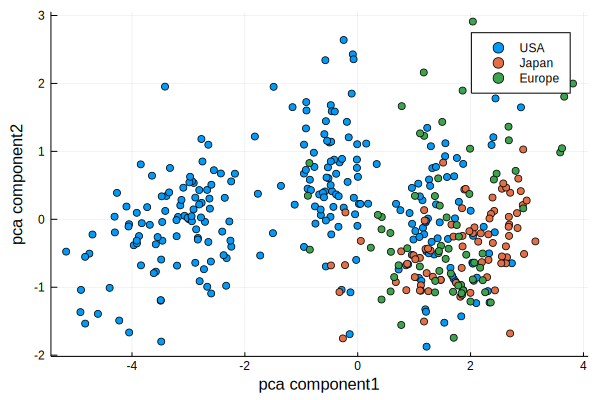

In [103]:
#facciamo un plot delle macchine usando dati ridimensionati
Plots.scatter(Yte[1,car_origin.=="USA"],Yte[2,car_origin.=="USA"],color=1,label="USA")
Plots.scatter!(Yte[1,car_origin.=="Japan"],Yte[2,car_origin.=="Japan"],color=2,label="Japan")
Plots.scatter!(Yte[1,car_origin.=="Europe"],Yte[2,car_origin.=="Europe"],color=3,label="Europe")
#ogni plot.scatter plotta solo campioni di una determinata car_origin
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")

In [47]:
#sembrerebbero esserci 3 aggruppamenti principali di macchine, di sole o qwuasi sole macchine USA e uno misto
#proviamo ora un grafico 3d con makie
p = fit(PCA,data',maxoutdim=3)# ridimensina in massimo 3 invece che 2 come prima
Yte = MultivariateStats.transform(p, data')
scene = Makie.scatter(Yte[1,:],Yte[2,:],Yte[3,:],color=uniqueids)

┌ Info: Makie/AbstractPlotting is caching fonts, this may take a while. Needed only on first run!
└ @ AbstractPlotting C:\Users\i am\.julia\packages\AbstractPlotting\ru2ib\src\utilities\texture_atlas.jl:109


In [51]:
#quando finisce blocco sopra si può far vedere il grafic con 

display(scene)

# appareirà una finestra makie dove si può vedere ilòg rafico in 3d da tutte le anguature
#vediamo che gli aggruppamnti sono notabili anche in 3 dimensionalità

GLMakie.Screen(...)

┌ Info: Installing sklearn via the Conda scikit-learn package...
└ @ PyCall C:\Users\i am\.julia\packages\PyCall\zqDXB\src\PyCall.jl:697
┌ Info: Running `conda install -y scikit-learn` in root environment
└ @ Conda C:\Users\i am\.julia\packages\Conda\3rPhK\src\Conda.jl:113


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\i am\.julia\conda\3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-0.16.0              |             py_0         210 KB
    scikit-learn-0.23.2        |   py38h47e9c7a_0         4.7 MB
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          17 KB
    ------------------------------------------------------------
                                           Total:         4.9 MB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/noarch::joblib-0.16.0-py_0
  scikit-learn       pkgs/main/win-64::scikit-learn-0.23.2-py38h47e9c7a_0
  threadpoolctl      pkgs/main/noarch::threadpoolctl-2.1.0-pyh5ca1d4c_0



threadpoolctl-2.1.0  | 17 KB     | ########## | 100% 
scikit-learn-0.23.2  | 4.7 MB    | ########## | 100% 
joblib-

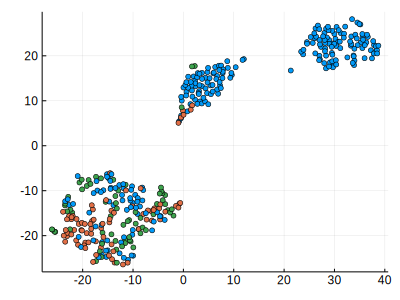

In [52]:
# t-SNE
# proviam a chiamare t-sne chiamando una fun dal pacchetto scikitlearn python
@sk_import manifold : TSNE# installa scikit via conda
tfn = TSNE(n_components=2) #,perplexity=20.0,early_exaggeration=50)
Y2 = tfn.fit_transform(data);
Plots.scatter(Y2[:,1],Y2[:,2],color=uniqueids,legend=false,size=(400,300),markersize=3)
#nb non passiamo trasposta, 

In [53]:
#vediamo ancora i 3 aggruppamenti

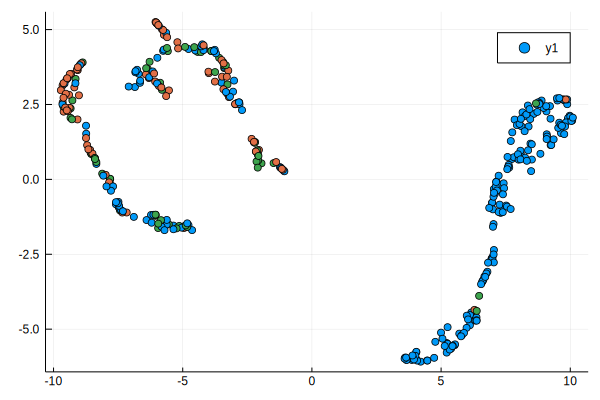

In [84]:
# umap
# per umap dobbiam assare praticamente una matrice di distanze tra i dati
# la definizione di tale mat di distanza dipende da che tipo di distanze posssono essere utili per i dati

L = cor(data ,data,dims=2) #distanza definita come correlazione
embedding = umap(L, 2)

Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)

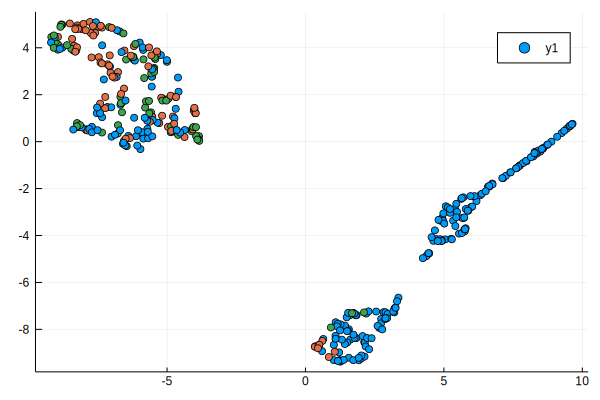

In [85]:
# vediamo con la distanza euclidiana dei campioni
L = pairwise(Euclidean(), data, data,dims=1) 
embedding = umap(L, 2)
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)

In [76]:
# in totale sembrerebbe che macchine europee e giapponesi siano simili in caratteristiche, mentre macchine american3
# per lo più formano 2 loro gruppi separati dal resto